# L'objectif des "compare" est d'évaluer la qualité des calages effectués. Ils comparent les dépenses ou quantités agrégées de Budget des Familles après calage, avec celles de la comptabilité nationale. Le calage est effectué sur les dépenses en carburants.

# Import de modules généraux

In [1]:
import pkg_resources
import os
import pandas as pd
from pandas import concat
import seaborn

from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_line

seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Import des fichiers csv donnant les montants agrégés des dépenses répertoriées dans les enquêtes BdF. Ces montants sont calculés dans compute_depenses_carburants

In [5]:
assets_directory = os.path.join(
    pkg_resources.get_distribution('openfisca_france_indirect_taxation').location
    )

products = ['transports', 'carburants', 'essence', 'diesel']
depenses_bdf = pd.DataFrame()
for element in products:
    depenses = pd.read_csv(os.path.join(assets_directory,
            'openfisca_france_indirect_taxation', 'assets', 'depenses',
            'depenses_{}_totales_bdf.csv').format(element), sep = ',')
    depenses.rename(
        columns = {"depense": 'depense_{}_bdf'.format(element)}, 
        inplace = True,
        )
    
    depenses.set_index('annee', inplace = True)
    depenses_bdf = concat([depenses / 1e6, depenses_bdf], axis = 1)

print(depenses_bdf)


       depense_diesel_bdf  depense_essence_bdf  depense_carburants_bdf  \
annee                                                                    
2011         27636.350100         14116.600743            41752.950842   
2005         18882.886691         15723.113224            34605.999915   
2000         12987.594644         18087.405340            31074.999984   

       depense_transports_bdf  
annee                          
2011            131062.850158  
2005            105711.877297  
2000             90351.335559  


# Import des fichiers csv donnant les montants agrégés des mêmes postes d'après la comptabilité nationale

In [10]:
parametres_fiscalite_file_path = os.path.join(
    assets_directory,
    'openfisca_france_indirect_taxation',
    'assets',
    'legislation',
    'Parametres fiscalite indirecte.xls'
    )
masses_cn_data_frame = pd.read_excel(parametres_fiscalite_file_path, sheet_name = "consommation_CN")


masses_cn_carburants = masses_cn_data_frame[masses_cn_data_frame['Fonction'] == 'Carburants et lubrifiants']
masses_cn_carburants = masses_cn_carburants.transpose()

masses_cn_carburants.rename(columns = {76: 'carburants agregat'}, inplace = True)


masses_cn_transports = masses_cn_data_frame[masses_cn_data_frame['Fonction'] == 'Transports']
masses_cn_transports = masses_cn_transports.transpose()
masses_cn_transports.rename(columns = {69: 'transports agregat'}, inplace = True)

comparaison_bdf_agregats = concat([
    depenses_bdf, 
    masses_cn_carburants, 
    masses_cn_transports], 
    axis = 1
    )
comparaison_bdf_agregats = comparaison_bdf_agregats.dropna()
print(comparaison_bdf_agregats)


      depense_diesel_bdf  depense_essence_bdf  depense_carburants_bdf  \
2000        12987.594644         18087.405340            31074.999984   
2005        18882.886691         15723.113224            34605.999915   
2011        27636.350100         14116.600743            41752.950842   

      depense_transports_bdf carburants agregat transports agregat  
2000            90351.335559            31075.7             116130  
2005           105711.877297              34606             136837  
2011           131062.850158            41765.9             160316  


# Création des graphiques pour comparer les consommations obtenues via Budget des familles vis-à-vis de la comptabilité nationale

Comparaison des dépenses agrégées en carburant, Budget des Familles par rapport à la comptabilité nationale


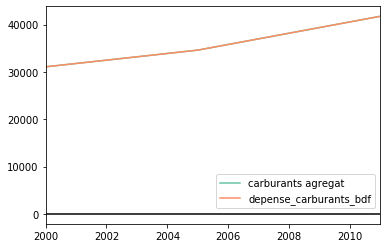

Comparaison des dépenses agrégées sur les transports, Budget des Familles par rapport à la comptabilité nationale


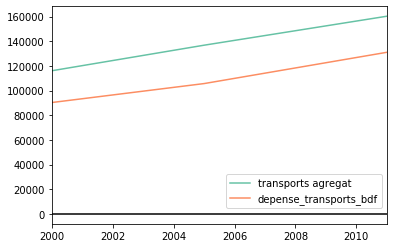

In [11]:
print('Comparaison des dépenses agrégées en carburant, Budget des Familles par rapport à la comptabilité nationale')
graph_builder_line(comparaison_bdf_agregats[['carburants agregat', 'depense_carburants_bdf']])
print('Comparaison des dépenses agrégées sur les transports, Budget des Familles par rapport à la comptabilité nationale')
graph_builder_line(comparaison_bdf_agregats[['transports agregat', 'depense_transports_bdf']])